In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# checking null values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: >

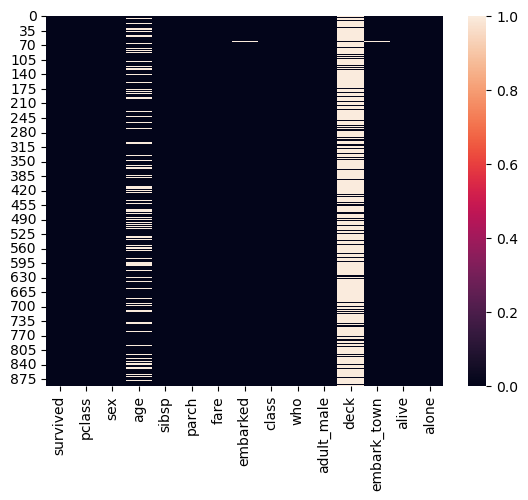

In [5]:
# visualisation of missing values
sns.heatmap(df.isnull())

In [6]:
# handling missing value by deleting all the rows
# row wise deletion
df1 = df.dropna() #bad practice

In [7]:
df1.shape

(182, 15)

In [8]:
df.shape

(891, 15)

In [9]:
#column wise deletion
# do it only when the column does not hold significant value
df2 = df.dropna(axis = 1)

# IMPUTATION TECHNIQUE
1- mean value imputation

C:\Users\user\AppData\Local\Temp\ipykernel_17932\2409177837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

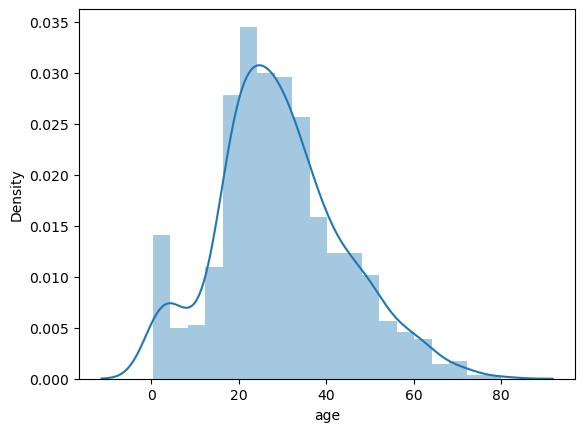

In [10]:
sns.distplot(df.age)

<Axes: xlabel='age', ylabel='Count'>

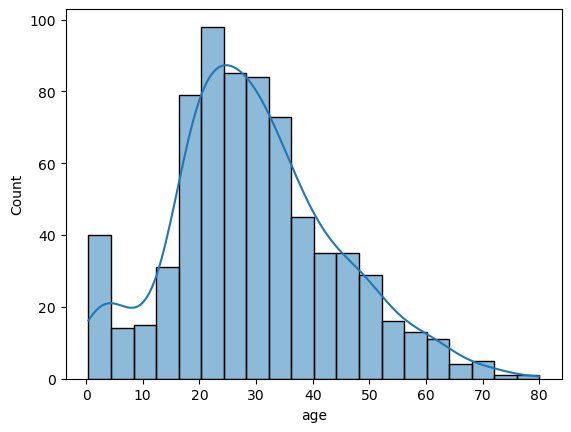

In [11]:
# or
sns.histplot(df.age , kde = True)

In [12]:
df.age.isnull().sum()

177

In [13]:
df['Age_mean'] = df['age'].fillna(df['age'].mean()) #for normally distributed data

In [24]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000


2 - median value imputation

In [14]:
df['Age_median'] = df['age'].fillna(df['age'].median()) #when you have outliers

In [15]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22.000000,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38.000000,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26.000000,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35.000000,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35.000000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,27.000000,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,19.000000,19.0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,29.699118,28.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,26.000000,26.0


3 - mode value imputation

In [16]:
# for categorical feature
mode = df[df['age'].notna()]['embarked'].mode()[0]

In [17]:
df['embarked_mode'] = df['embarked'].fillna(mode)

In [18]:
df['embarked_mode'].isnull().sum()

0

<Axes: >

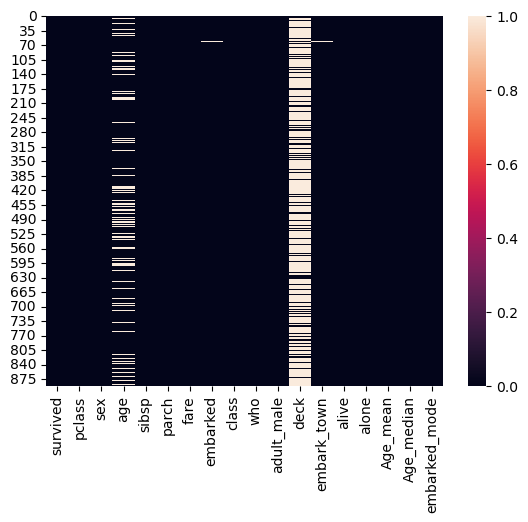

In [19]:
sns.heatmap(df.isnull())

# Handling Imbalanced Dataset

upsampling
Down Sampling

In [20]:
import numpy as np
import pandas as pd

In [21]:
# set the random seed for reproducibility
np.random.seed(123)
# creating dataframe
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples - n_class_0

In [22]:
n_class_0

900

In [23]:
n_class_1

100

In [24]:
class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc = 0 , scale = 1 , size=n_class_0),
    'feature_2' : np.random.normal(loc = 0 , scale = 1 , size=n_class_0),
    'target' : [0]*n_class_0
})

In [25]:
class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc = 2 , scale = 1 , size=n_class_1),
    'feature_2' : np.random.normal(loc = 2 , scale = 1 , size=n_class_1),
    'target' : [1]*n_class_1
})

In [26]:
df = pd.concat([class_0 , class_1]).reset_index(drop = True)

In [27]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

# upsampling

In [28]:
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [29]:
df_minority

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [30]:
df_majority

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [31]:
from sklearn.utils import resample

In [70]:
df_minority_upsample = resample(df_minority, replace = True,
                                n_samples = len(df_majority),
                                random_state = 42
                               )

In [72]:
df_minority_upsample.shape

(900, 3)

In [74]:
df_upsampled = pd.concat([df_majority,df_minority_upsample])

In [75]:
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

# Down sample

In [77]:
class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc = 0 , scale = 1 , size=n_class_0),
    'feature_2' : np.random.normal(loc = 0 , scale = 1 , size=n_class_0),
    'target' : [0]*n_class_0
})
class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc = 2 , scale = 1 , size=n_class_1),
    'feature_2' : np.random.normal(loc = 2 , scale = 1 , size=n_class_1),
    'target' : [1]*n_class_1
})
df = pd.concat([class_0 , class_1]).reset_index(drop = True)

In [78]:
df_majority_downsample = resample(df_majority, replace = False,
                                n_samples = len(df_minority),
                                random_state = 42
                               )

In [81]:
df_majority_downsample.shape

(100, 3)

In [82]:
df_downsampled = pd.concat([df_majority_downsample,df_minority])

In [83]:
df_downsampled

,feature_1,feature_2,target
70,0.771282,0.683400,0
827,1.387072,-0.344344,0
231,-0.371739,3.037878,0
588,-1.445274,-0.401074,0
39,0.860312,-0.446072,0
...,...,...,...
995,2.281368,4.225488,1
996,1.546471,3.271831,1
997,3.221672,0.841888,1
998,1.853730,-0.339923,1


In [85]:
df_downsampled['target'].value_counts()

0    100
1    100
Name: target, dtype: int64

# SMOTE

In [32]:
from sklearn.datasets import make_classification

In [33]:
X,y=make_classification(n_samples  = 1000, n_features = 2,n_redundant = 0, n_clusters_per_class = 1, weights = [0.90],random_state = 1)

In [34]:
X,y

(array([[ 1.53682958, -1.39869399],
        [ 1.55110839,  1.81032905],
        [ 1.29361936,  1.01094607],
        ...,
        [-0.55662536, -0.15983725],
        [ 1.00499902,  0.93628981],
        [ 1.46210987,  1.14497791]]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [35]:
import pandas as pd
df1 = pd.DataFrame(X,columns=['f1' , 'f2'])
df2 = pd.DataFrame(y,columns = ['target'])
final_df=pd.concat([df1,df2],axis=1)

In [36]:
final_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [95]:
final_df['target'].value_counts()

0    894
1    106
Name: target, dtype: int64

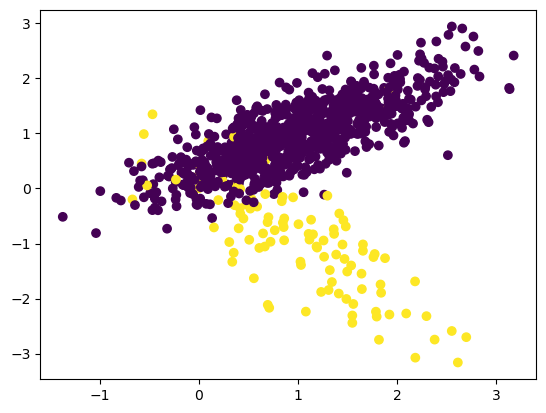

In [96]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'] , c=final_df['target'])

In [99]:
# smote
!pip install imblearn

In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
# TRANFORMING THE DATASET
oversample = SMOTE()
X,y=oversample.fit_resample(final_df[['f1' , 'f2']],final_df['target'])

In [102]:
X.shape

(1788, 2)

In [103]:
y.shape

(1788,)

In [105]:
len(y[y==0])

894

In [106]:
len(y[y==1])

894

In [108]:
df1 = pd.DataFrame(X,columns = ['f1' , 'f2'])
df2 = pd.DataFrame(y,columns = ['target'])
oversample_df = pd.concat([df1,df2] , axis=1)

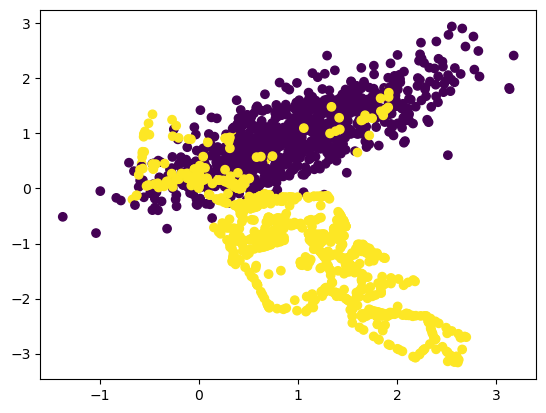

In [110]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

# Data Interpolation

# linear Interpolation

In [111]:
import numpy as np

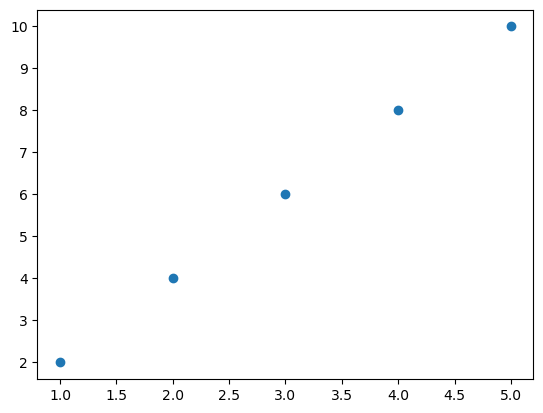

In [112]:
x = np.array([1,2,3,4,5])
y = np.array([2,4,6,8,10])
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [113]:
x_new = np.linspace(1,5,10) #creating new x values
y_interp = np.interp(x_new ,x,y) #interpolate y values
print(y_interp)

[ 2.          2.88888889  3.77777778  4.66666667  5.55555556  6.44444444
  7.33333333  8.22222222  9.11111111 10.        ]


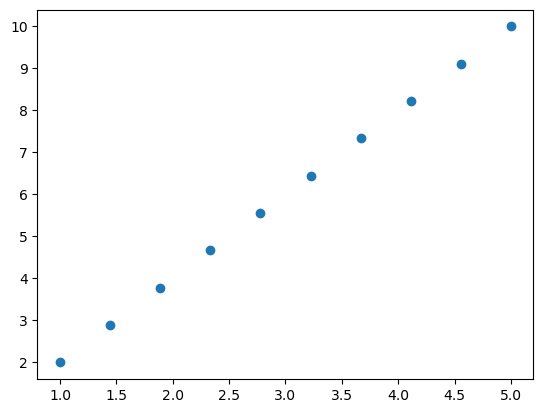

In [114]:
plt.scatter(x_new , y_interp)

# cubic interpolation

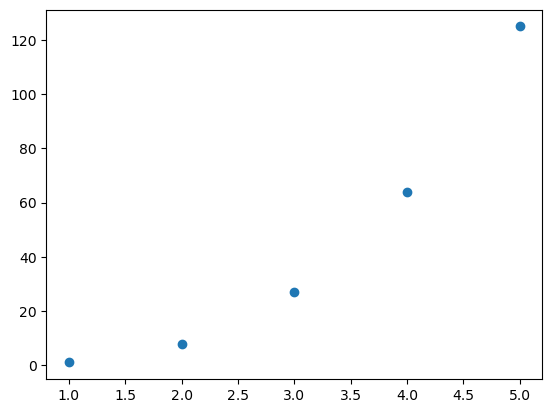

In [115]:
x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125])
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [116]:
from scipy.interpolate import interp1d

In [117]:
# craete a cubic interpolation function
f = interp1d(x,y,kind = 'cubic')

In [118]:
# interpolate the data
x_new = np.linspace(1,5,10)
y_interp = f(x_new)

In [119]:
y_interp

array([  1.        ,   3.01371742,   6.739369  ,  12.7037037 ,
        21.43347051,  33.45541838,  49.2962963 ,  69.48285322,
        94.54183813, 125.        ])

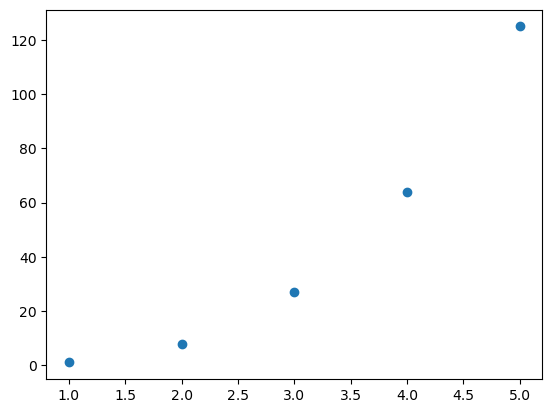

In [120]:
plt.scatter(x,y)

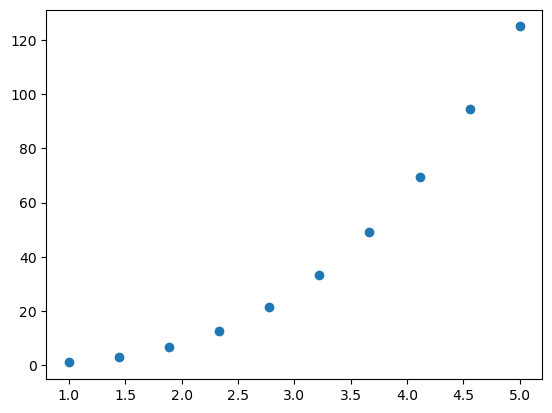

In [121]:
plt.scatter(x_new,y_interp)

# polynomial interpolation

In [127]:
x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125])

In [128]:
p = np.polyfit(x,y,2) #fits a 2nd degree polynomial to the data

In [129]:
x_new = np.linspace(1,5,10)
y_interp = np.polyval(p,x_new) #interpolate y value

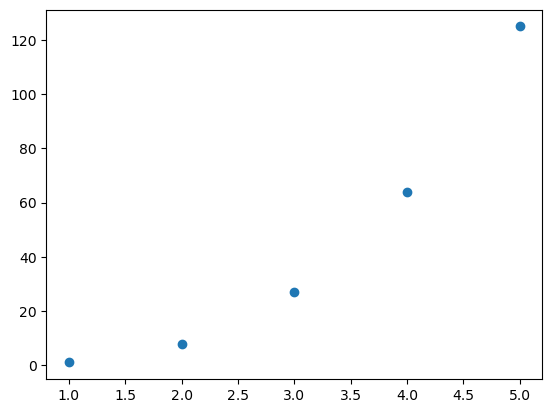

In [130]:
plt.scatter(x,y)

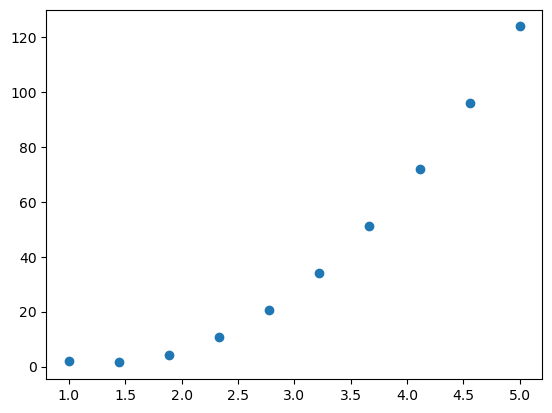

In [131]:
plt.scatter(x_new , y_interp)

# Feature Extraction

# 1 - Feature Scaling

# a) Standardization

In [133]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='Count'>

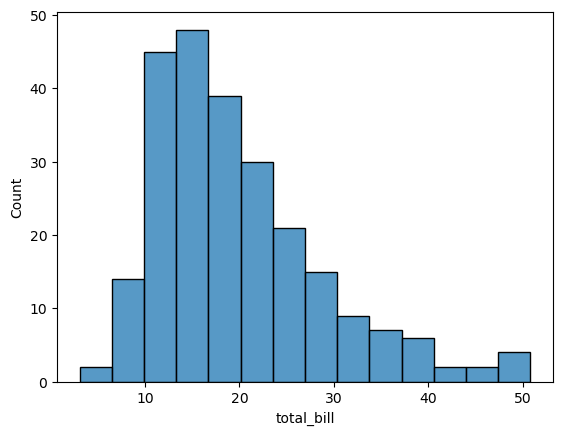

In [135]:
sns.histplot(df['total_bill'])

In [142]:
mean = np.mean(df['total_bill'])
std = np.std(df['total_bill'])

In [143]:
mean,std

(19.78594262295082, 8.88415057777113)

In [146]:
normalised_data = []
for i in list(df['total_bill']):
    z_score = (i - mean)/std
    normalised_data.append(z_score)

<Axes: ylabel='Count'>

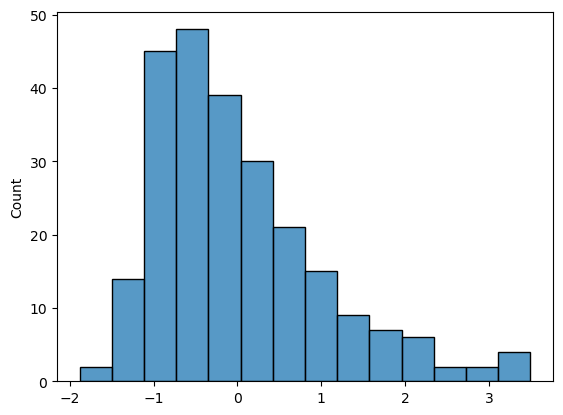

In [148]:
sns.histplot(normalised_data)

In [149]:
# range has been scaled down

In [151]:
# using library
from sklearn.preprocessing import StandardScaler

In [152]:
scaler = StandardScaler()

In [153]:
scaler

StandardScaler()

In [154]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [159]:
scaler.fit(df[['total_bill']])

StandardScaler()

In [161]:
scaler.fit(df[['total_bill' , 'tip']])

StandardScaler()

In [164]:
pd.DataFrame(scaler.transform(df[['total_bill' , 'tip']]) , columns = ['total_bill' , 'tips'])

,total_bill,tips
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


# b - Normalization - Min Max Scaler

In [29]:
import seaborn as sns

In [30]:
df = sns.load_dataset('taxis')

In [31]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
min_max = MinMaxScaler()

In [34]:
min_max.fit(df[['distance' , 'fare' , 'tip']])

MinMaxScaler()

In [35]:
min_max.transform(df[['distance' , 'fare' , 'tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [40]:
import pandas as pd
df1 = pd.DataFrame(min_max.fit_transform(df[['distance','fare','tip']]),columns = ['f1' , 'f2' , 'f3'])

<Axes: xlabel='f1', ylabel='Count'>

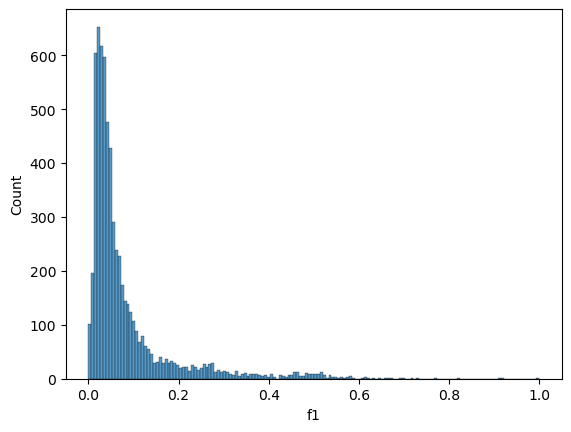

In [41]:
sns.histplot(df1['f1'])

# c - Unit Vector

In [43]:
import seaborn as sns

In [44]:
df = sns.load_dataset('iris')

In [45]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [47]:
from sklearn.preprocessing import normalize

In [53]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [56]:
df = pd.DataFrame(normalize(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]),columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [57]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


# Nominal/ one hot encoding

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.DataFrame({
    'color' : ['red' , 'blue' , 'green','green','red','blue']
})

In [3]:
df

,color
0,red
1,blue
2,green
3,green
4,red
5,blue


In [4]:
# create an instance of one hot encoder
encoder=OneHotEncoder()

In [6]:
encoder.fit_transform(df[['color']])

<6x3 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [7]:
encoder.fit_transform(df[['color']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [8]:
encoded = encoder.fit_transform(df[['color']]) #fit the encoder to the dataframe and transform the categorical variable 

In [10]:
import pandas as pd
encoded_Df = pd.DataFrame(encoded.toarray(),columns = encoder.get_feature_names_out())

In [11]:
encoded_Df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [12]:
pd.concat([df , encoded_Df],axis = 1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


# label and ordinal encoding

In [13]:
import pandas as pd

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
df

,color
0,red
1,blue
2,green
3,green
4,red
5,blue


In [16]:
# create an instance of label encoder

In [17]:
encoder = LabelEncoder()

In [19]:
encoder.fit_transform(df['color'])

array([2, 0, 1, 1, 2, 0])

In [20]:
# by default alphabetical sequence 

In [22]:
# ordinal encoding(below)

In [23]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
df = pd.DataFrame({'size' : ['small' , 'medium' , 'large' , 'medium' , 'small' , 'large']})

In [27]:
df

,size
0,small
1,medium
2,large
3,medium
4,small
5,large


In [28]:
encoder = OrdinalEncoder(categories = [['small' , 'medium' , 'large']]) #describing rank

In [29]:
encoder.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [33]:
pd.concat([df , pd.DataFrame(encoder.fit_transform(df[['size']]))] , axis = 1)

,size,0
0,small,0.0
1,medium,1.0
2,large,2.0
3,medium,1.0
4,small,0.0
5,large,2.0


# Target Guided Ordinal Encoding

In [34]:
# it is a technique used to encode categorical variables based on their relationship with the target variable.

In [35]:
# this encoding technique is useful when we have a categorical variable with a large number of unique categories.

In [36]:
# we want to use this variable as a feature in out ml model

In [37]:
# we replace each categorical variable with a numerical variable based on the mean or median of the target variable for that category

In [46]:
df = pd.DataFrame({
    'city' : ['new york' , 'landon' , 'paris' , 'tokyo' , 'new york' , 'paris'],
    'price': [200,150,300,250,180,360]
})

In [47]:
df.head()

,city,price
0,new york,200
1,landon,150
2,paris,300
3,tokyo,250
4,new york,180


In [48]:
# calculate the mean price for each city

In [51]:
mean_price = df.groupby('city')['price'].mean().to_dict()
mean_price

{'landon': 150.0, 'new york': 190.0, 'paris': 330.0, 'tokyo': 250.0}

In [52]:
# replace each city with its mean_price
df['city_encoded'] = df['city'].map(mean_price)

In [53]:
df

,city,price,city_encoded
0,new york,200,190.0
1,landon,150,150.0
2,paris,300,330.0
3,tokyo,250,250.0
4,new york,180,190.0
5,paris,360,330.0


# Covariance And Correlation

In [55]:
import seaborn as sns

In [56]:
df = sns.load_dataset('healthexp')

In [57]:
df

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


In [58]:
df.cov()

C:\Users\user\AppData\Local\Temp\ipykernel_13008\1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Year,Spending_USD,Life_Expectancy
Year,201.098848,2.571883e+04,41.915454
Spending_USD,25718.827373,4.817761e+06,4166.800912
Life_Expectancy,41.915454,4.166801e+03,10.733902


In [59]:
df.corr(method = 'pearson')

C:\Users\user\AppData\Local\Temp\ipykernel_13008\3294333281.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson')


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.826273,0.902175
Spending_USD,0.826273,1.000000,0.579430
Life_Expectancy,0.902175,0.579430,1.000000


In [60]:
df.corr(method = 'spearman')

C:\Users\user\AppData\Local\Temp\ipykernel_13008\875244283.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'spearman')


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.931598,0.896117
Spending_USD,0.931598,1.000000,0.747407
Life_Expectancy,0.896117,0.747407,1.000000


In [61]:
df1= sns.load_dataset('tips')

In [63]:
df1.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_13008\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000
